This part gives an implementation of the Convolutionla Neural Network architecture.  
And we will be using the MNIST dataset for our implementation process for easy understanding.  

In [2]:
#Importing the necessary packages

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
#Importing the CNN related layers as described in Chapter 2
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils

In [4]:
# DownLoading data from Keras datasets(inbuild)

In [5]:
x_train, y_train, x_test, y_test = mnist.load_data()

Redefining the weight, height and number of samples.  
Each Image is a 28 x 28 with 1 channel matrix.

In [6]:
training_samples, height, width = x_train.shape
testing_samples,_,_ = x_test.shape

In [7]:
print(" The training Samples are :",training_samples)
print(" The testing Samples are :",testing_samples)
print("Height: "+str(height)+" x Width:"+ str(width))

 The training Samples are : 60000
 The testing Samples are : 10000
Height: 28 x Width:28


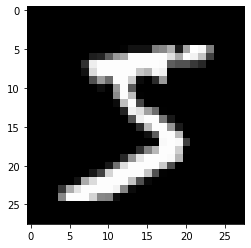

In [8]:
#Lets have a look at a sample image in the training data
plt.imshow(x_train[0],cmap='gray', interpolation='none')

We now have to engineer the image data into the right form
For CNN, we would need the data in Height x Width X Channels
form Since the image is in grayscale, we will use channel = 1

In [ ]:
channel =1
x_train = x_train.reshape(training_samples, height,
width,channel).astype('float32')
x_test = x_test.reshape(testing_samples, height, width,
channel).astype('float32')

Standardizing the values   
To improve the training process(between 0-1)

In [10]:
x_train = x_train/255
x_test =x_test/255

In [ ]:
#Total number of digits=10(clases)
target_classes = 10
# numbers 0-9, so ten classes
n_classes = 10

In [11]:
# convert integer labels into one-hot vectors
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

In [ ]:
# Defining the CNN Model Architecture for use.

In [12]:
model = Sequential()
model.add(Conv2D(64, (5, 5), input_shape=(height,width ,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

In [ ]:
# Compile model

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit the model

In [14]:
model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 29s 97ms/step - loss: 0.2363 - accuracy: 0.9271 - val_loss: 0.0575 - val_accuracy: 0.9821
Epoch 2/10
300/300 [==============================] - 29s 98ms/step - loss: 0.0615 - accuracy: 0.9812 - val_loss: 0.0346 - val_accuracy: 0.9887
Epoch 3/10
300/300 [==============================] - 29s 96ms/step - loss: 0.0433 - accuracy: 0.9865 - val_loss: 0.0290 - val_accuracy: 0.9901
Epoch 4/10
300/300 [==============================] - 29s 96ms/step - loss: 0.0351 - accuracy: 0.9889 - val_loss: 0.0303 - val_accuracy: 0.9897
Epoch 5/10
300/300 [==============================] - 29s 96ms/step - loss: 0.0299 - accuracy: 0.9907 - val_loss: 0.0249 - val_accuracy: 0.9912
Epoch 6/10
300/300 [==============================] - 30s 98ms/step - loss: 0.0250 - accuracy: 0.9922 - val_loss: 0.0242 - val_accuracy: 0.9928
Epoch 7/10
300/300 [==============================] - 29s 97ms/step - loss: 0.0214 - accuracy: 0.9928 - val_loss: 0.0242 - val_accuracy:

Point of Comparison for Image Augmentation  
Plot of images as baseline for comparison

In [17]:
from keras.datasets import mnist
from matplotlib import pyplot

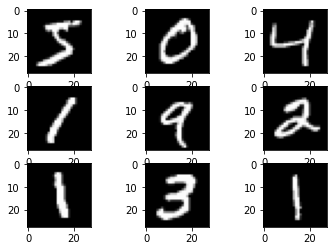

In [18]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
    # show the plot
pyplot.show()

In [19]:
# Feature Standardization
# Standardize images across the dataset, mean=0, stdev=1

In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

In [2]:
# load data

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# reshape to be [samples][pixels][width][height]

In [5]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [6]:
# convert from int to float

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
# define data preparation

In [10]:
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

In [11]:
# fit parameters from data

In [12]:
datagen.fit(X_train)

/home/jeremiah/anaconda32/envs/ai/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  ' channels).')


In [13]:
# configure batch size and retrieve one batch of images

/home/jeremiah/anaconda32/envs/ai/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


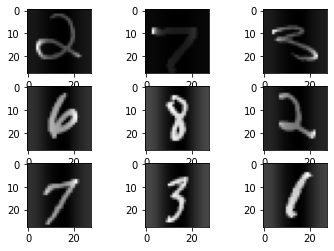

In [14]:
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
        # show the plot
    pyplot.show()
    break